In [85]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats
import scipy

import plotly.express as px

from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [173]:
def get_xyz(da, fraction):

    x = da.x.values
    y = da.y.values
    x, y = np.meshgrid(x,y)
    x = x.ravel()
    y = y.ravel()
    z = da.values.squeeze().ravel()
    rand_ints = np.random.uniform(0,len(z),int(np.floor(len(z)*fraction)))
    rand_ints = [int(np.floor(x)) for x in rand_ints]
    len(rand_ints)
    x = x[rand_ints]
    y = y[rand_ints]
    z = z[rand_ints]
    
    return x, y, z

In [3]:
# The two netcdfs created in the previous notebook, one has some correction for negative snow depth values and the other has the snow depth values cut at zero
# ds = xr.open_dataset('/home/lumbraca/raster/data/rapid_model_cleandata_create_netcdf_cutatzero.nc') # for the snow depth values cut a zero
ds = xr.open_dataset('~/RAPID/rapid_model_cleandata_create_netcdf_negtozero.nc') # for the snow depth values negative to zeros
# ds.close() # how to close a dataset 

In [244]:
# coarsen the data by a factor of n

n = None

if n != None:
    new_height = int(np.floor(1388/n))
    new_width = int(np.floor(2564/n))
    ds_resampled1 = ds.rio.reproject( ds.rio.crs, shape=(new_height, new_width), resampling=Resampling.average )
    ds_resampled = ds_resampled1.rio.reproject( ds_resampled1.rio.crs, shape=(1388, 2564), resampling=Resampling.nearest )
else:
    ds_resampled = ds

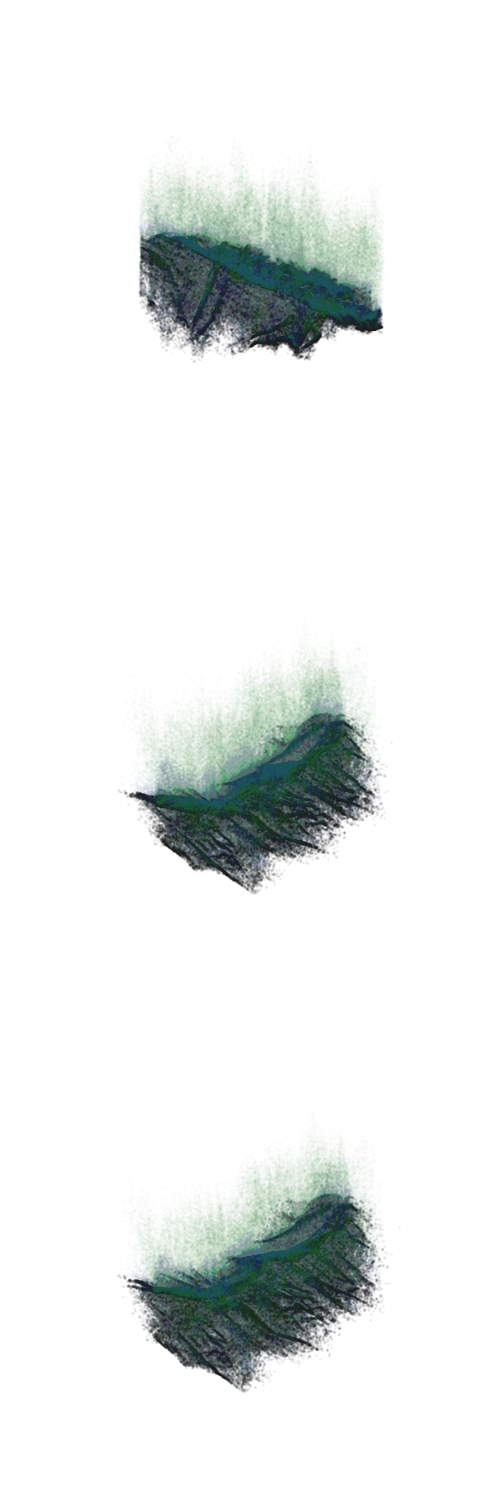

In [245]:
x, y, z = get_xyz(ds_resampled.dem,0.1)

snow_multiplier = 100
xs, ys, zs = get_xyz((snow_multiplier*ds_resampled.hs_ncalm+ds_resampled.dem).where(ds_resampled.hs_ncalm!=0),0.1)

veg_multiplier = 10
xv, yv, zv = get_xyz((veg_multiplier*ds_resampled.chmws_ncalm+ds_resampled.dem).where(ds_resampled.chmws_rapid!=0),0.1)

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(311, projection='3d')
ax2 = fig.add_subplot(312, projection='3d')
ax3 = fig.add_subplot(313, projection='3d')

axes = [ax1, ax2, ax3]


for ax in axes:
    ax.plot(x,y,z, color='k', zorder=15, linestyle='none', marker='o', markersize=1, alpha=0.05)
    ax.plot(xs, ys, zs, color='b', zorder=15, linestyle='none', marker='o', markersize=1, alpha=0.01)
    ax.plot(xv, yv, zv, color='g', zorder=15, linestyle='none', marker='o', markersize=1, alpha=0.01)
    ax.axis('off')
    #ax.set_zlim(800,1500)
    #ax.set_ylim(210500, 211300)
    #ax.set_xlim(465500, 466000)

ax1.view_init(elev=35, azim=100)
ax2.view_init(elev=35, azim=200)
ax3.view_init(elev=45, azim=205)


fig.tight_layout()

